In [12]:
import pandas as pd
import matplotlib.pyplot as plt



# Cargar el archivo CSV
#data = pd.read_csv('Solicitudes_ProcesoWally-Carga.csv', delimiter=';')
data = pd.read_csv('Car_Prices_Poland.csv')
# Mostrar las primeras filas del dataframe
data.head()

def show_table(data):
    return data.head()


def plot_bar(data):
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) == 0:
        print("No hay columnas categóricas disponibles para visualizar.")
        return
    # Elegir la columna categórica con la menor cantidad de categorías
    col = min(categorical_cols, key=lambda x: data[x].nunique())
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_pie(data):
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) <= 1:
        print("No hay suficientes columnas categóricas disponibles para visualizar.")
        return
    # Elegir otra columna categórica
    col = categorical_cols[1]
    data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Proporción de {col}')
    plt.ylabel('')
    plt.show()

def plot_histogram(data):
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    if len(numeric_cols) == 0:
        print("No hay columnas numéricas disponibles para visualizar.")
        return
    col = numeric_cols[0]
    plt.hist(data[col], bins=30, color='lightgreen', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y')
    plt.show()

def plot_line(data):
    date_cols = data.select_dtypes(include=['datetime']).columns
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    if len(date_cols) == 0 or len(numeric_cols) == 0:
        print("No hay columnas de fecha y/o numéricas disponibles para visualizar.")
        return
    plt.plot(data[date_cols[0]], data[numeric_cols[0]], color='royalblue')
    plt.title(f'Tendencia de {numeric_cols[0]} en función de {date_cols[0]}')
    plt.xlabel(date_cols[0])
    plt.ylabel(numeric_cols[0])
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

def plot_scatter(data):
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    if len(numeric_cols) < 2:
        print("No hay suficientes columnas numéricas disponibles para visualizar.")
        return
    plt.scatter(data[numeric_cols[0]], data[numeric_cols[1]], color='purple', alpha=0.6)
    plt.title(f'Relación entre {numeric_cols[0]} y {numeric_cols[1]}')
    plt.xlabel(numeric_cols[0])
    plt.ylabel(numeric_cols[1])
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

def plot_box(data):
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    if len(numeric_cols) == 0:
        print("No hay columnas numéricas disponibles para visualizar.")
        return
    plt.boxplot(data[numeric_cols[0]], vert=False, patch_artist=True, boxprops=dict(facecolor='lightyellow'))
    plt.title(f'Distribución de {numeric_cols[0]}')
    plt.xlabel(numeric_cols[0])
    plt.yticks([])
    plt.grid(axis='x')
    plt.show()

def plot_area(data):
    date_cols = data.select_dtypes(include=['datetime']).columns
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    if len(date_cols) == 0 or len(numeric_cols) == 0:
        print("No hay columnas de fecha y/o numéricas disponibles para visualizar.")
        return
    plt.fill_between(data[date_cols[0]], data[numeric_cols[0]], color='lightpink', label=numeric_cols[0])
    plt.title(f'Evolución de {numeric_cols[0]} en función de {date_cols[0]}')
    plt.xlabel(date_cols[0])
    plt.ylabel(numeric_cols[0])
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [13]:
show_table(data)

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


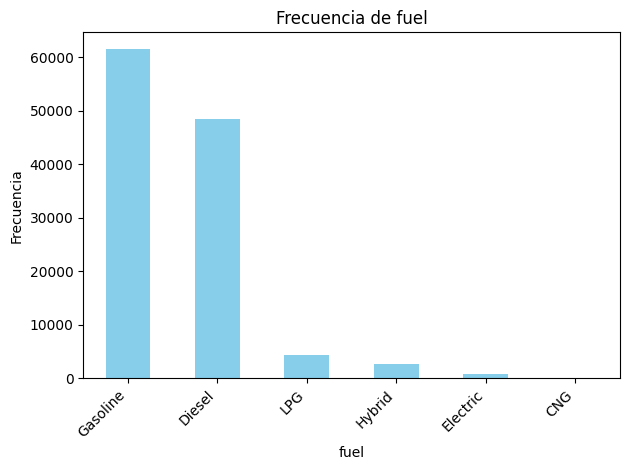

In [14]:
plot_bar(data)

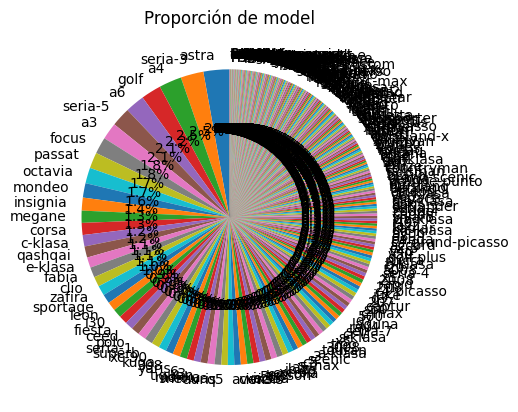

In [15]:
plot_pie(data)

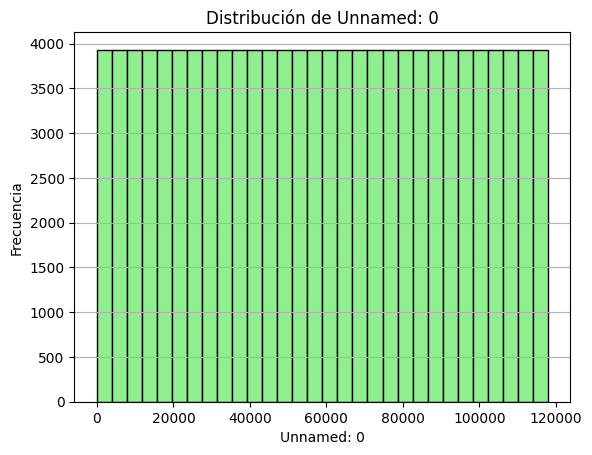

In [16]:
plot_histogram(data)

In [17]:
plot_line(data)

No hay columnas de fecha y/o numéricas disponibles para visualizar.


In [18]:
plot_area(data)

No hay columnas de fecha y/o numéricas disponibles para visualizar.


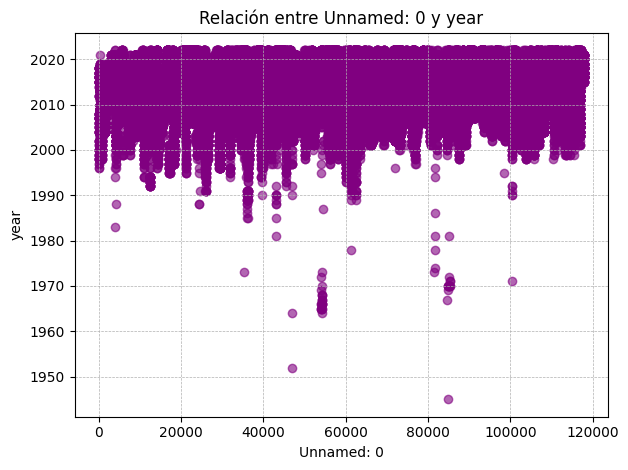

In [19]:
plot_scatter(data)

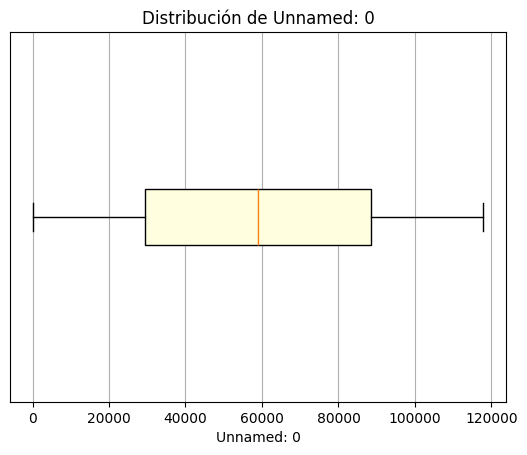

In [20]:
plot_box(data)